<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Oct20_21/DESI_EDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [ ]:
#The spectra files we will be using had been preprocessed so that they only include quasars with redshift above 2.1
#For more publicily available spectra of all different targets that DESI observe consult https://data.desi.lbl.gov/doc/
#Lets read open one spectra file.
spec_file=fits.open("/content/drive/MyDrive/Machine_Learning/DESI/coadd-sv3-dark-9930.fits")

In [ ]:
#Display the contect of the file, organized in different HDUs. each HDU can be of a different type.
spec_file.info()

Filename: /content/drive/MyDrive/Machine_Learning/DESI/coadd-sv3-dark-9930.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   11R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   1434R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 11)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 11)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 11)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 11)   float32   
  8  R_WAVELENGTH    1 ImageHDU        1

In [ ]:
#The FIBERMAP HDU contains information about the object that was observed,
# in particular we will be interested in the TARGETID, the unique identifier
# assigned to each object observed in DESI

fibermap=Table(spec_file["FIBERMAP"].data)
fibermap

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39633158248860187,0,234.7704149873764,44.39108161949448,-1.1088411,-1.947482,2015.5,4611686018427393606,1,TGT,0.2935470200951962,63,9011,2346p445,562939,2587,PSF,0.017097494,7.3669534,8.466139,10.715407,11.298954,17.484056,196.56413,122.45445,135.76204,5.573048,1.4807794,5.7292438,6.5840755,8.333321,5.7292438,6.5840755,8.333321,0,0.0,0.0,0.0,0.0,1397526111227879040,G2,20.454554,20.663158,19.905909,-0.2956178,N,103400,9,4611686018427393606,0,0,34359738368,0,0,0,234.7704149873764,44.39108161949448,4,3720.437,4,4,0.00975,0.012379418,-0.008,0.01155422,234.77046836479772,0.21082917,44.3911142986861,0.11946119,0.789
39633162560603324,0,234.8450667227985,44.76387887023483,0.0,0.0,2015.5,4611686018427393606,1,TGT,0.6095534925017012,63,9011,2349p447,563967,1212,PSF,0.014939815,2.5253031,3.1998527,4.366032,7.7781205,10.086306,558.0038,188.70312,77.29164,5.9529705,1.5987699,1.9631622,2.4875548,3.3941388,1.9631622,2.4875548,3.3941388,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,9,4611686018427393606,0,0,34359738368,0,0,0,234.8450667227985,44.76387887023483,2,1522.4106,2,2,0.0005,0.0025495098,-0.0075,0.011335784,234.8450703012312,0.07426518,44.763907420731066,0.11754271,0.789
39633158248858158,0,234.57074180054917,44.557763733896444,0.0,0.0,2015.5,4674,1,TGT,0.8748142543070724,1,9011,2346p445,562939,558,PSF,0.019440606,0.3863989,0.4428361,0.87726057,1.7296386,0.53936297,712.6825,273.1222,90.99081,6.6912427,1.8003536,0.30037448,0.34424698,0.68195504,0.30037448,0.34424698,0.68195504,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103100,9,4674,0,0,0,0,0,0,234.57074180054917,44.557763733896444,2,1776.131,2,2,0.0025,0.002915476,-0.012,0.013,234.57075649434745,0.04285556,44.55781028213255,0.07084771,0.789
39633162564798529,0,235.2574047796485,44.839677070602164,0.0,0.0,2015.5,1028,1,TGT,0.4305605003011923,1,9011,2352p447,563968,2113,PSF,0.017009692,1.8590575,1.7628545,1.6930434,4.2262173,3.304231,455.55722,193.31769,90.13082,6.5004253,1.7512256,1.4452658,1.3704756,1.3162031,1.4452658,1.3704756,1.3162031,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,4,1028,0,0,0,0,0,0,235.2574047796485,44.839677070602164,2,2334.3809,2,2,0.0065,0.0065192026,-0.0135,0.014983324,235.25744207700563,0.017352914,44.83972898375434,0.088835,0.789
39633166855570067,0,235.0111848862819,44.90084018249816,0.0,0.0,2015.5,5702,1,TGT,0.39661401241819594,1,9011,2351p450,564991,659,PSF,0.013088547,0.7714703,0.6705034,1.3080568,3.0750005,5.084676,424.76572,146.44208,91.721725,6.548802,1.7081472,0.6006053,0.5220005,1.0183488,0.6006053,0.5220005,1.0183488,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,9,5702,0,0,0,0,0,0,235.0111848862819,44.90084018249816,4,4270.6904,4,4,0.0075,0.010173495,-0.

In [ ]:
#As can be seen in the table, we have spectra of 49 quasars.

In [ ]:
#Lets save the TARGETIDs into one variable for future use
tids=fibermap["TARGETID"]

In [ ]:
#Now, the spectra DESI observed for each quasar, i.e. for a given targetid,
#is saved in HDUs named  B_FLUX, R_FLUX, Z_FLUX.
#And the Wavelenght grids are in B_WAVELENGTH,B_WAVELENGTH,Z_WAVELENGTH HDUs respectively.
# B,R,Z correspond to the different bands of the DESI spectrographs.
# Lets access to the spectra, only b band for now,  and plot it.
bwave = spec_file["B_WAVELENGTH"].data
bflux = spec_file["B_FLUX"].data

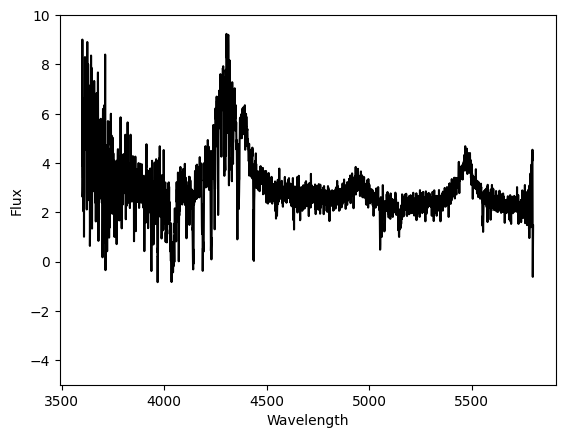

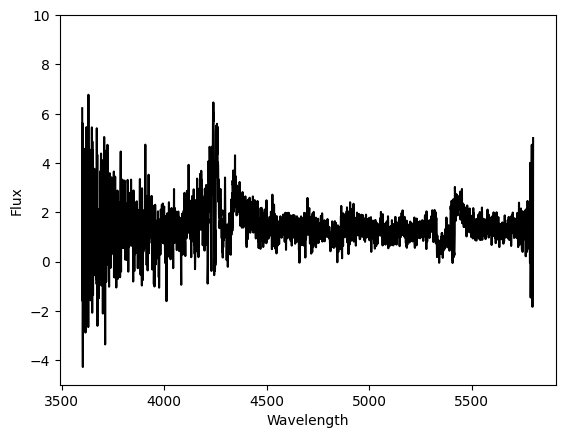

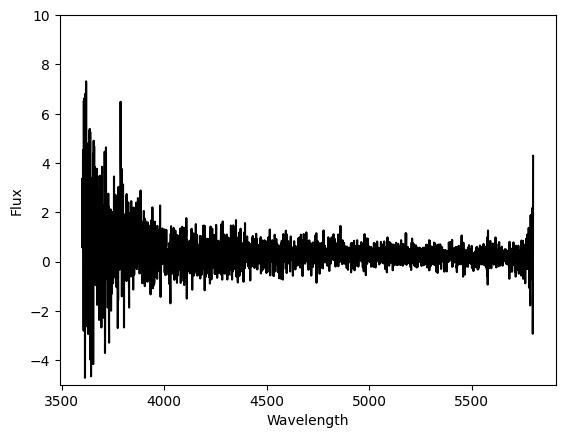

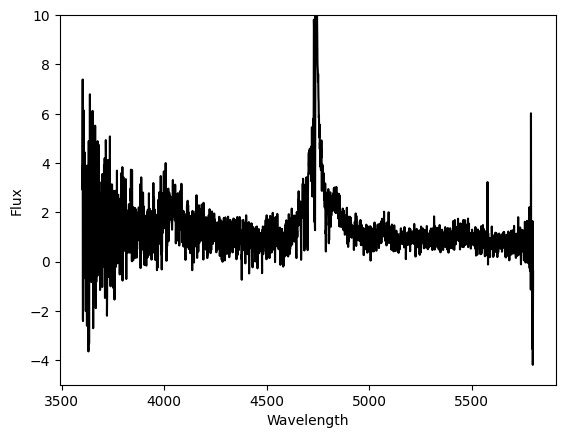

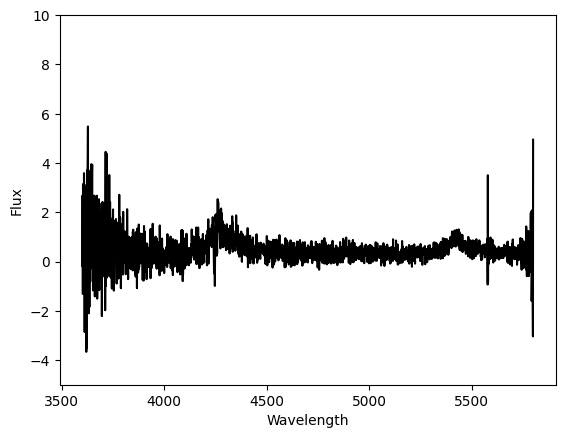

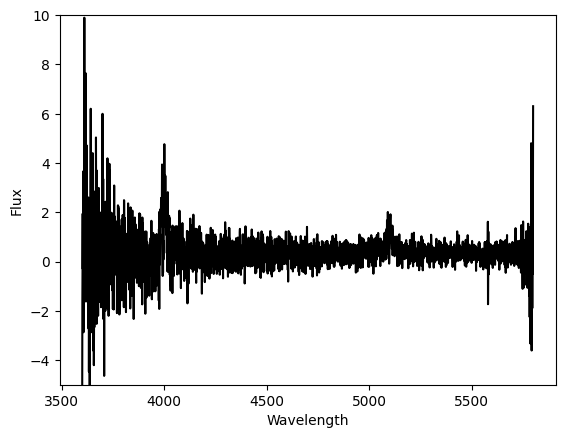

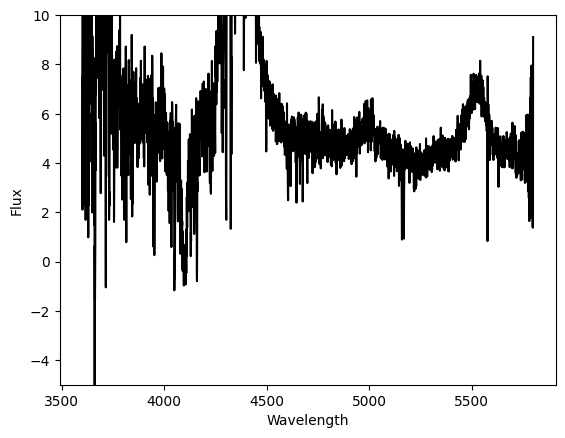

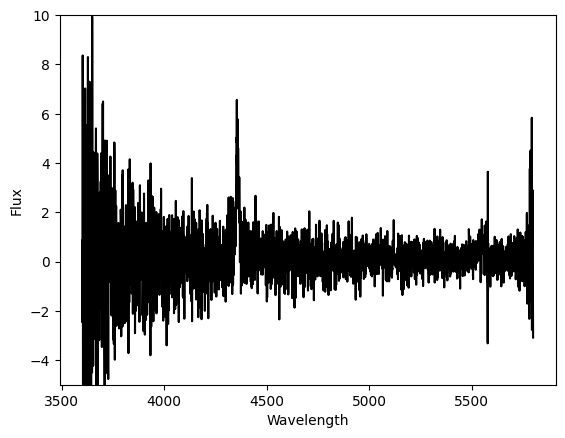

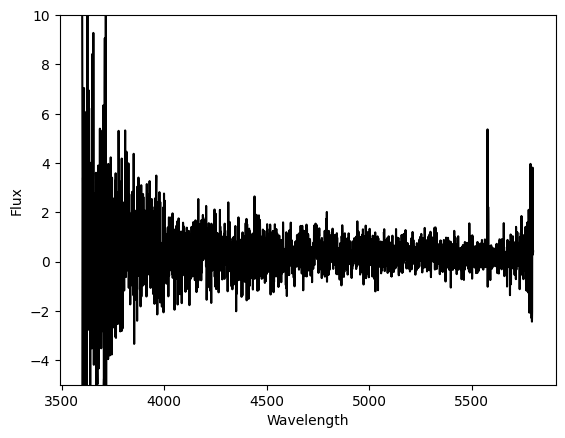

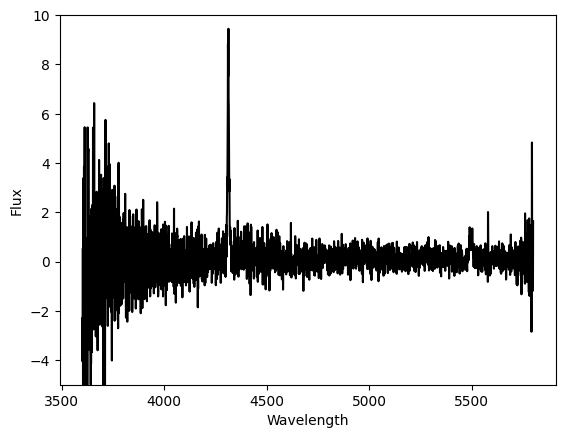

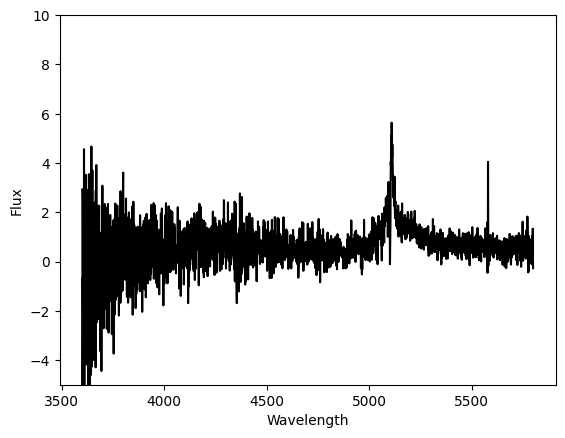

In [ ]:
#Lets plot the first 10 spectra
for i in range(11):
  plt.plot(bwave,bflux[i],'k')
  plt.ylim(-5,10)
  plt.xlabel('Wavelength')
  plt.ylabel('Flux')
  plt.show()

Exercise: Use the PCA analysis to find the principal components that corresponds for the spectra we have. Do it first for the spectra in only one file, then combine the data from different files and make the PCA again.

In [ ]:
%%capture
!pip install astroML
!pip install latex
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [ ]:
from sklearn.decomposition import PCA
from astroML.datasets import sdss_corrected_spectra
from astroML.utils.decorators import pickle_results

In [ ]:
from sklearn.decomposition import PCA

pca = PCA() #this part of the code is to compute the eigenvalues of the spectra
pca.fit(bflux) #in this case the blue spectra bflux
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()

In [ ]:
evecs = pca.components_
evals = pca.explained_variance_

In [ ]:
evals_cs

array([0.78535212, 0.82867142, 0.8616563 , 0.89328759, 0.92055358,
       0.94260772, 0.9617004 , 0.97863114, 0.99231462, 1.        ,
       1.        ])

In [ ]:
bflux_mean = bflux.mean(0) #we nedd to find the mean of the flux to compute de
bflux_mean.shape #coefficients

(2751,)

In [ ]:
bflux[0].shape

(2751,)

In [ ]:
# Find the coefficients of a particular spectrum
spec = bflux[0]
coeff = np.dot(evecs, spec - bflux_mean)

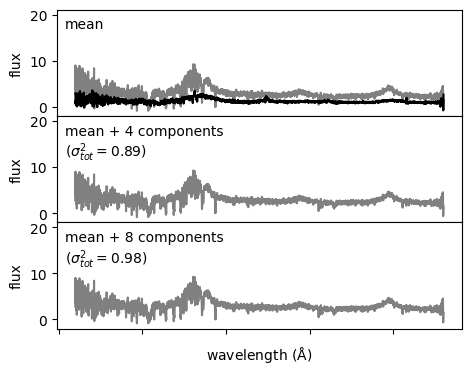

In [ ]:
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8]):
    ax = fig.add_subplot(411 + i)
    ax.plot(bwave, spec, '-', c='gray')
    ax.plot(bwave, bflux_mean + np.dot(coeff[:n], evals_cs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()

In [ ]:
# In principle all these spectra corresponds to quasar spectra and redshift above 1.8,
# however we need to read one more table to know the redshift that DESI measured for each of the objects we have.

In [ ]:
#In this case we will read the redshift catalog as a table directly.
zcat=Table.read("/content/drive/MyDrive/Machine_Learning/DESI/zall-pix-edr-vac.fits",hdu=1)
#Display the redshift catalog.
zcat

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

In [ ]:
#From the zcat table, the most important thing we will use is the TARGETID, the SURVEY, the SPECTYPE and the redshift Z.
#Lets reduce the table to just these variables.
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39628473198708395,cmx,STAR,-0.0019956912923479522
39628473198709499,cmx,GALAXY,0.797663336968385
39628473198710139,cmx,GALAXY,1.33150513847107
39628473198710603,cmx,GALAXY,0.804205874112604
39628473198711006,cmx,STAR,-6.607473910190775e-05
39628473198711342,cmx,STAR,-0.0019956912923479522
39628473198711925,cmx,GALAXY,0.39072440164450306
39628473202901028,cmx,GALAXY,0.6657999257489294
39628473202901626,cmx,GALAXY,0.32842015807005115


In [ ]:
#Now lets reduce the table to contain only the elements for which the TARGETIDs that we identified in our spectra file are present
#For this we need to know that such files correspond to the SURVEY=sv3 (as indicated in the filename)
#So, lets make first a filter for sv3
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497761027054,sv3,GALAXY,0.8047145429076951
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663
616088497765221450,sv3,GALAXY,0.07358486749516376
616088497765221501,sv3,GALAXY,0.719444701817346
616088497769415698,sv3,GALAXY,0.039215908005138314
616088497773610181,sv3,GALAXY,0.2864062436603106
616088497819747217,sv3,GALAXY,0.4960341488452893
616088497819747383,sv3,GALAXY,1.0968576187793935


In [ ]:
#Now lets keep only the elements corresponding to the TARGETIDS we have in the spectrafile
mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39633158248857947,sv3,GALAXY,1.151781988401353
39633158248858158,sv3,QSO,2.1134594118588965
39633158248859282,sv3,QSO,2.581010614027139
39633158248859374,sv3,QSO,2.545502090098194
39633158248860187,sv3,QSO,2.525881833284675
39633162556410465,sv3,QSO,2.5710418416508545
39633162556411118,sv3,QSO,2.289001349735822
39633162560603324,sv3,QSO,2.4947356961771976
39633162564798529,sv3,QSO,2.896743104487403


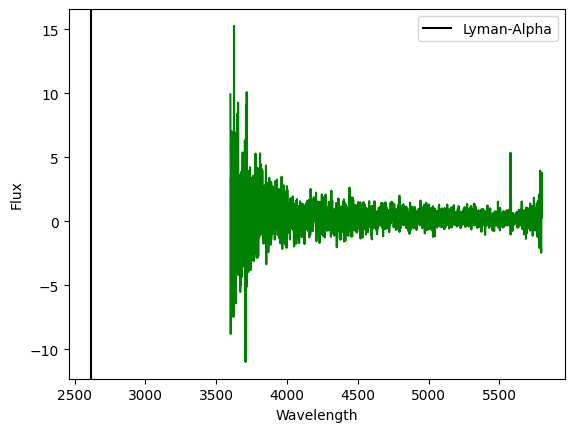

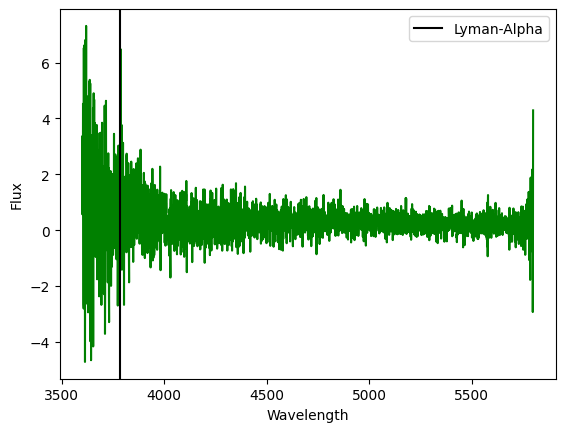

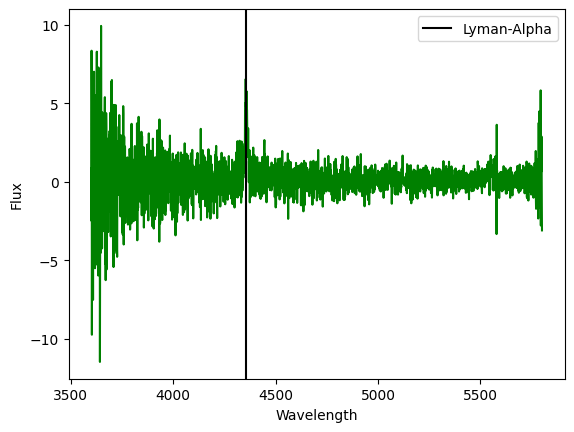

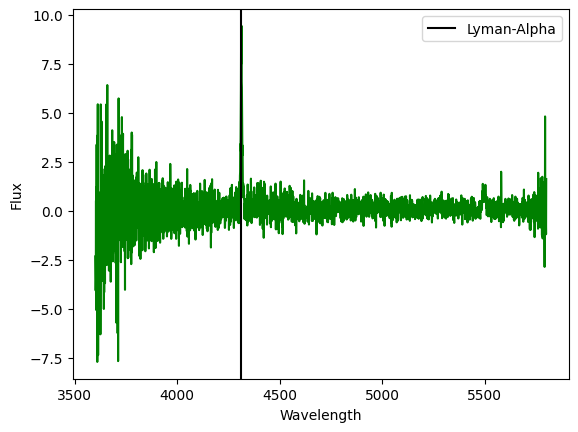

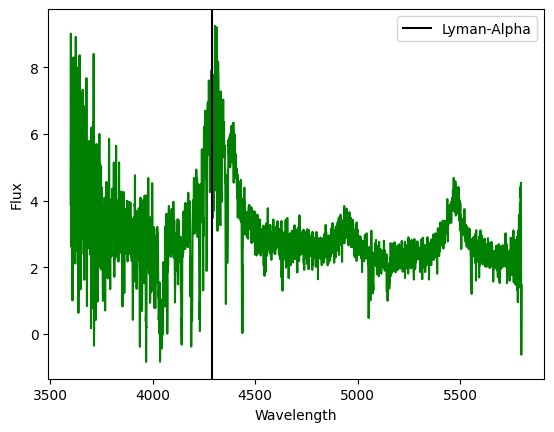

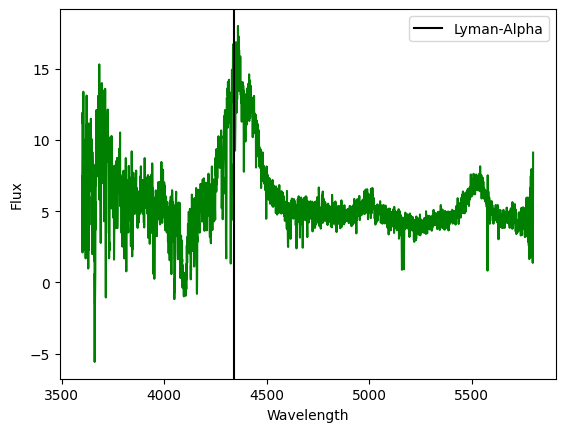

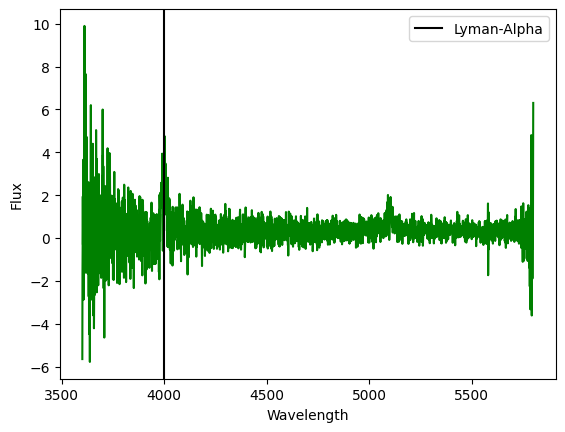

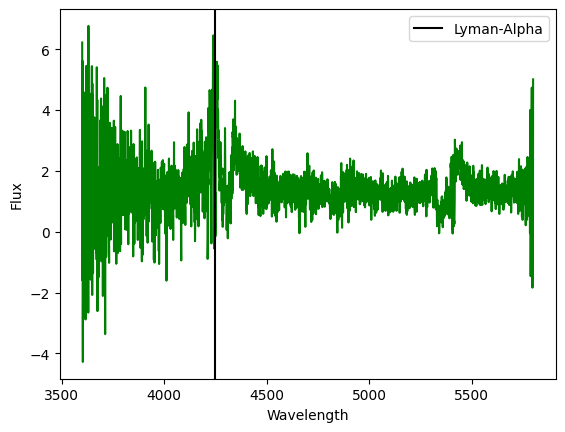

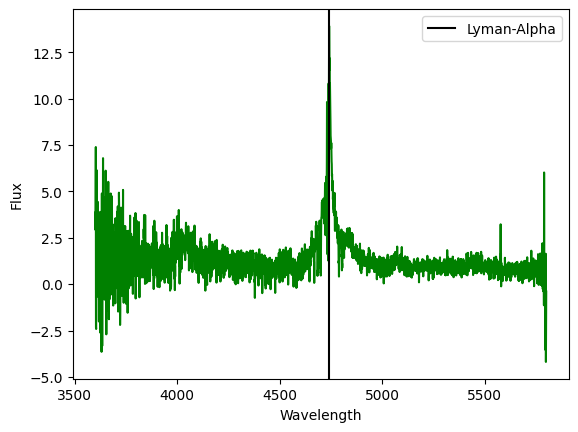

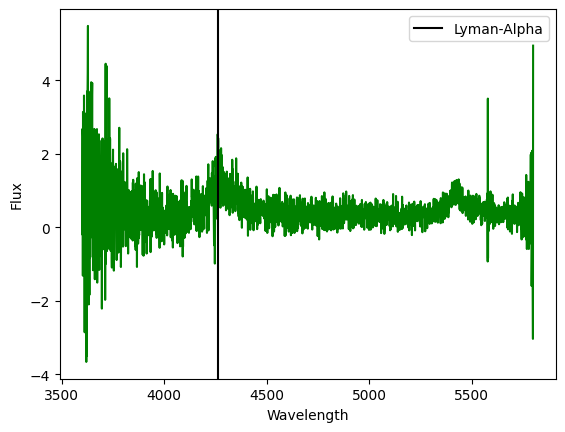

In [ ]:
#As we can see we have now a table with only 49 elements, and most of the spectype is of the QSO kind.
#So now we now for a given TARGETID what is the corresponding redshift of the Quasar
# Now lets see if there is agrrement, by ploting the possition of the Lyman-alpha emission
# line for the first 10 elements in the catalog

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave,bflux[indx], color = 'Green')
  plt.axvline(1216*(1+z),color='black', label = 'Lyman-Alpha')
  plt.xlabel('Wavelength')
  plt.ylabel('Flux')
  plt.legend()
  plt.show()

In [ ]:
#We can see in most of the cases the position of the redline, which is the expected position of the Lya emission line
#match very well with the position of a strong emission line in the data. So we are confident that we are matching correctly
#the spectra with the quasar redshift.

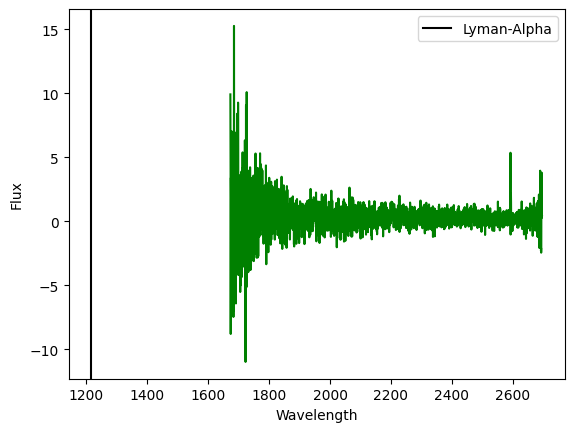

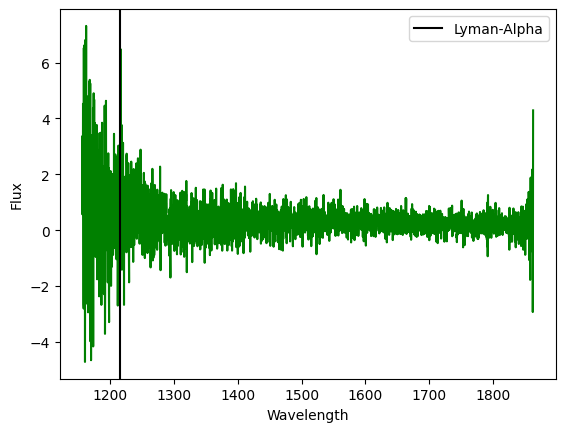

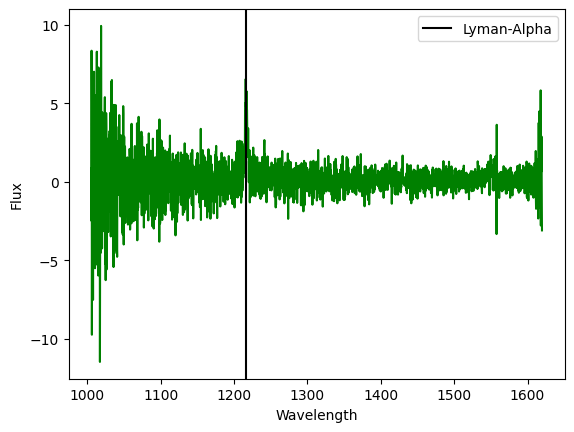

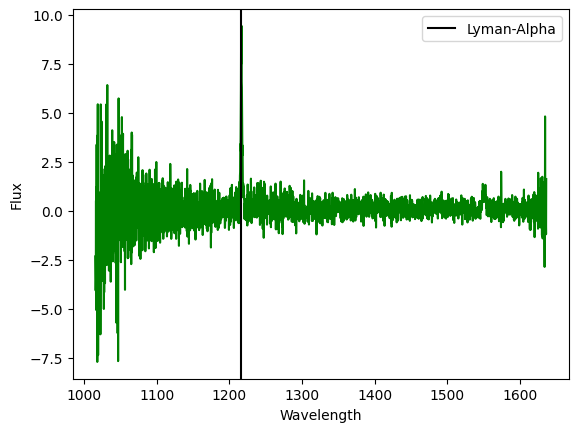

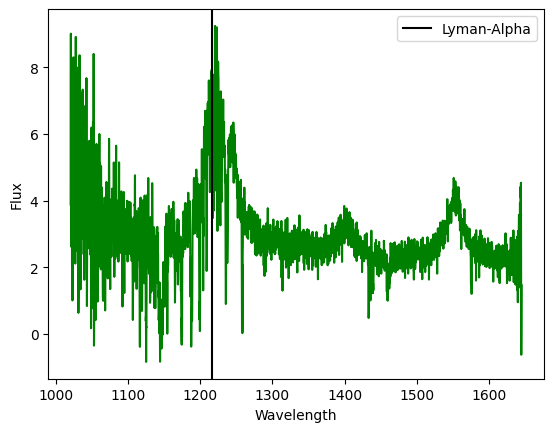

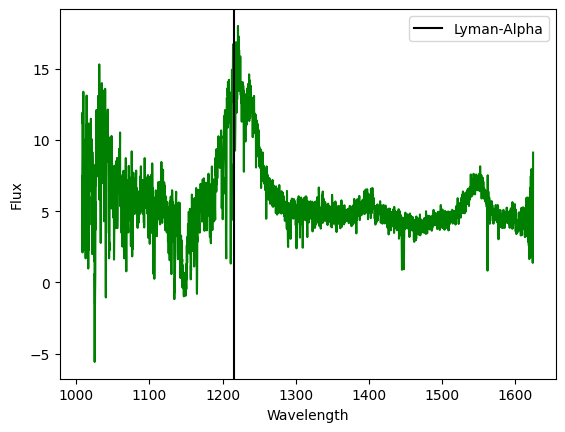

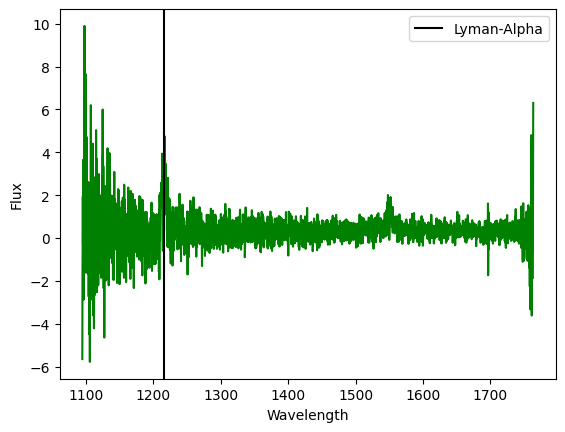

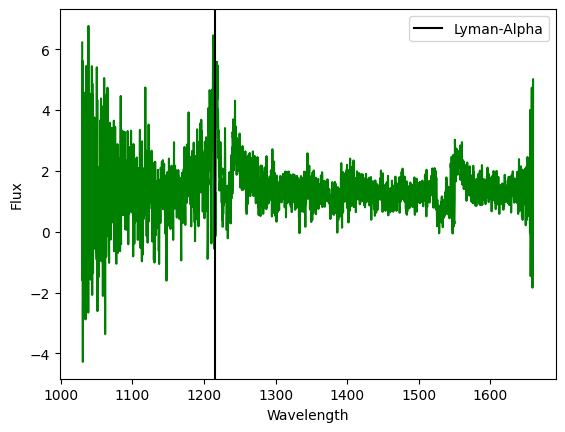

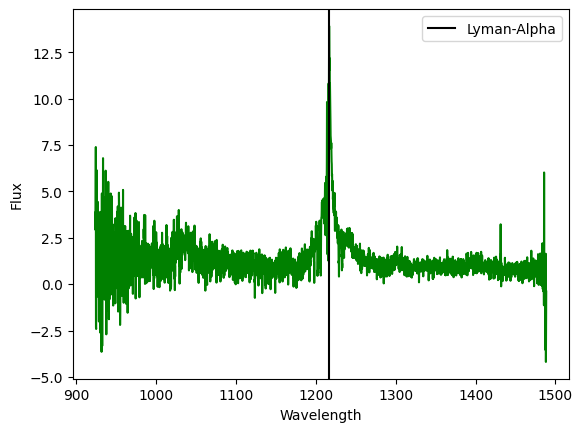

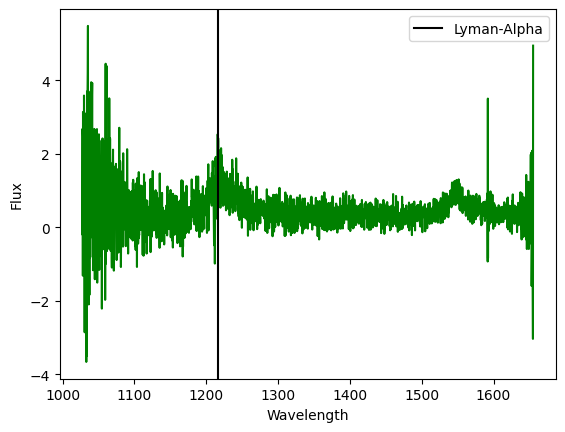

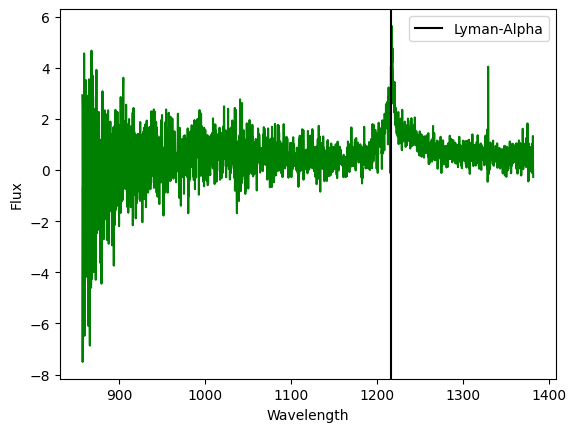

In [ ]:
#No we can convert our spectra from the observed frame to restframe, to do so we need to convert the wavelentgh array
#for each of the spectra to the observed frame using the redhisft.
#Again, here is an example for the first ten spectra

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:11]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave/(1+z),bflux[indx], color = 'green')
  plt.axvline(1216,color='black', label = 'Lyman-Alpha')
  plt.ylabel('Flux')
  plt.xlabel('Wavelength')
  plt.legend()
  plt.show()

Excersise: Now that you can convert the spectra to the rest frame, create a wavelength array in the rest frame that is common for all the spectra, and interpolate de spectra in such array. So that all your spectra have the same wavelenght array as before and you can apply now the PCA analysis.

In [ ]:
#im going to create an array of the wavelength
#in the rest frame for the three type of spectra
bwave = spec_file["B_WAVELENGTH"].data
bflux = spec_file["B_FLUX"].data

In [ ]:
bwave.shape

(2751,)

In [ ]:
for i,tid in enumerate(zcat["TARGETID"][:11]): #know the spectra in bwave is
  z=zcat["Z"][i]                              #the spectra in the rest frame
  indx=np.where(tids==tid)[0][0]
  bwave = bwave/(1+z)

In [ ]:
bwave #we have now the first archive spectra in the rest frame

array([0.00510041, 0.00510155, 0.00510268, ..., 0.00821507, 0.0082162 ,
       0.00821733])

In [ ]:
spec_file2=fits.open("/content/drive/MyDrive/Machine_Learning/DESI/coadd-sv3-dark-25956.fits")

In [ ]:
spec_file2.info()

Filename: /content/drive/MyDrive/Machine_Learning/DESI/coadd-sv3-dark-25956.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   49R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   6847R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 49)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 49)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 49)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 49)   float32   
  8  R_WAVELENGTH    1 ImageHDU        

In [ ]:
fibermap2=Table(spec_file["FIBERMAP"].data)
fibermap2

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39633158248860187,0,234.7704149873764,44.39108161949448,-1.1088411,-1.947482,2015.5,4611686018427393606,1,TGT,0.2935470200951962,63,9011,2346p445,562939,2587,PSF,0.017097494,7.3669534,8.466139,10.715407,11.298954,17.484056,196.56413,122.45445,135.76204,5.573048,1.4807794,5.7292438,6.5840755,8.333321,5.7292438,6.5840755,8.333321,0,0.0,0.0,0.0,0.0,1397526111227879040,G2,20.454554,20.663158,19.905909,-0.2956178,N,103400,9,4611686018427393606,0,0,34359738368,0,0,0,234.7704149873764,44.39108161949448,4,3720.437,4,4,0.00975,0.012379418,-0.008,0.01155422,234.77046836479772,0.21082917,44.3911142986861,0.11946119,0.789
39633162560603324,0,234.8450667227985,44.76387887023483,0.0,0.0,2015.5,4611686018427393606,1,TGT,0.6095534925017012,63,9011,2349p447,563967,1212,PSF,0.014939815,2.5253031,3.1998527,4.366032,7.7781205,10.086306,558.0038,188.70312,77.29164,5.9529705,1.5987699,1.9631622,2.4875548,3.3941388,1.9631622,2.4875548,3.3941388,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,9,4611686018427393606,0,0,34359738368,0,0,0,234.8450667227985,44.76387887023483,2,1522.4106,2,2,0.0005,0.0025495098,-0.0075,0.011335784,234.8450703012312,0.07426518,44.763907420731066,0.11754271,0.789
39633158248858158,0,234.57074180054917,44.557763733896444,0.0,0.0,2015.5,4674,1,TGT,0.8748142543070724,1,9011,2346p445,562939,558,PSF,0.019440606,0.3863989,0.4428361,0.87726057,1.7296386,0.53936297,712.6825,273.1222,90.99081,6.6912427,1.8003536,0.30037448,0.34424698,0.68195504,0.30037448,0.34424698,0.68195504,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103100,9,4674,0,0,0,0,0,0,234.57074180054917,44.557763733896444,2,1776.131,2,2,0.0025,0.002915476,-0.012,0.013,234.57075649434745,0.04285556,44.55781028213255,0.07084771,0.789
39633162564798529,0,235.2574047796485,44.839677070602164,0.0,0.0,2015.5,1028,1,TGT,0.4305605003011923,1,9011,2352p447,563968,2113,PSF,0.017009692,1.8590575,1.7628545,1.6930434,4.2262173,3.304231,455.55722,193.31769,90.13082,6.5004253,1.7512256,1.4452658,1.3704756,1.3162031,1.4452658,1.3704756,1.3162031,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,4,1028,0,0,0,0,0,0,235.2574047796485,44.839677070602164,2,2334.3809,2,2,0.0065,0.0065192026,-0.0135,0.014983324,235.25744207700563,0.017352914,44.83972898375434,0.088835,0.789
39633166855570067,0,235.0111848862819,44.90084018249816,0.0,0.0,2015.5,5702,1,TGT,0.39661401241819594,1,9011,2351p450,564991,659,PSF,0.013088547,0.7714703,0.6705034,1.3080568,3.0750005,5.084676,424.76572,146.44208,91.721725,6.548802,1.7081472,0.6006053,0.5220005,1.0183488,0.6006053,0.5220005,1.0183488,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,N,103400,9,5702,0,0,0,0,0,0,235.0111848862819,44.90084018249816,4,4270.6904,4,4,0.0075,0.010173495,-0.

In [ ]:
tids2 = fibermap2['TARGETID'].data

In [ ]:
bwave2 = spec_file2['B_WAVELENGTH'].data
bflux2 = spec_file2['B_FLUX'].data

In [ ]:
#In this case we will read the redshift catalog as a table directly.
zcat2=Table.read("/content/drive/MyDrive/Machine_Learning/DESI/zall-pix-edr-vac.fits",hdu=1)
#Display the redshift catalog.
zcat2

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

In [ ]:
zcat2 = zcat2['TARGETID','SURVEY','SPECTYPE', 'Z']
zcat2

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39628473198708395,cmx,STAR,-0.0019956912923479522
39628473198709499,cmx,GALAXY,0.797663336968385
39628473198710139,cmx,GALAXY,1.33150513847107
39628473198710603,cmx,GALAXY,0.804205874112604
39628473198711006,cmx,STAR,-6.607473910190775e-05
39628473198711342,cmx,STAR,-0.0019956912923479522
39628473198711925,cmx,GALAXY,0.39072440164450306
39628473202901028,cmx,GALAXY,0.6657999257489294
39628473202901626,cmx,GALAXY,0.32842015807005115


In [ ]:
mask2 = zcat2['SURVEY']=='sv3'
zcat2 = zcat2[mask2]
zcat2

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497761027054,sv3,GALAXY,0.8047145429076951
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663
616088497765221450,sv3,GALAXY,0.07358486749516376
616088497765221501,sv3,GALAXY,0.719444701817346
616088497769415698,sv3,GALAXY,0.039215908005138314
616088497773610181,sv3,GALAXY,0.2864062436603106
616088497819747217,sv3,GALAXY,0.4960341488452893
616088497819747383,sv3,GALAXY,1.0968576187793935


In [ ]:
mask2 = np.in1d(zcat2['TARGETID'],tids2)
zcat2 = zcat2[mask2]
zcat2

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39633158248857947,sv3,GALAXY,1.151781988401353
39633158248858158,sv3,QSO,2.1134594118588965
39633158248859282,sv3,QSO,2.581010614027139
39633158248859374,sv3,QSO,2.545502090098194
39633158248860187,sv3,QSO,2.525881833284675
39633162556410465,sv3,QSO,2.5710418416508545
39633162556411118,sv3,QSO,2.289001349735822
39633162560603324,sv3,QSO,2.4947356961771976
39633162564798529,sv3,QSO,2.896743104487403


In [ ]:
for i, tid in enumerate(zcat2['TARGETID']):
  z = zcat2['Z'][i]
  index = np.where(tids2==tid)[0][0]
  bwave2 = bwave2/(1+z)

In [ ]:
bwave2 #now we have the second archive spectra in the rest frame:D

array([0.00510041, 0.00510155, 0.00510268, ..., 0.00821507, 0.0082162 ,
       0.00821733])

In [ ]:
spec_file3 = fits.open('/content/drive/MyDrive/Machine_Learning/DESI/coadd-sv3-dark-25965.fits')

In [ ]:
spec_file3.info()

Filename: /content/drive/MyDrive/Machine_Learning/DESI/coadd-sv3-dark-25965.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   52R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   8968R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 52)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 52)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 52)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 52)   float32   
  8  R_WAVELENGTH    1 ImageHDU        

In [ ]:
fibermap3 = Table(spec_file3['FIBERMAP'].data)
fibermap3

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627818581102013,0,217.8871590470009,1.2626859803727815,0.0,0.0,2015.5,4611686018427650052,1,TGT,0.17212498344453786,1,9010,2178p012,338439,3517,PSF,0.04038169,3.0252323,4.2583,4.8954315,7.6363053,11.76615,789.709,386.21207,115.93262,3.0741153,0.6962778,2.3518004,3.3103807,3.8056836,2.3618753,3.3405933,3.8628173,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,4611686018427650052,0,0,34359738368,0,0,0,217.8871590470009,1.2626859803727815,7,5485.3135,4,4,0.002,0.0038913824,0.0047142855,0.0051961523,217.8871671802638,0.048462477,1.262667730840558,0.030976126,0.789
39627818576909584,0,217.72641835961926,1.349977950198698,-0.07320497,-3.2254827,2015.5,4611686018428829766,1,TGT,0.45972477798879074,1,9010,2176p012,338438,5392,PSF,0.036744162,4.5209966,5.4033036,7.259487,9.316328,19.342964,927.2174,441.45282,147.75465,3.262002,0.6941918,3.5186553,4.2053475,5.65,3.5193515,4.206779,5.6510983,0,0.0,0.0,0.0,0.0,3654313584534157824,G2,20.386208,20.72688,19.976631,-0.86103463,S,103400,9,4611686018428829766,0,0,34460401664,0,0,0,217.72641835961926,1.349977950198698,9,7353.0654,4,4,-0.0025555557,0.0034156502,-0.0008888889,0.007916228,217.72640805034263,0.033199567,1.3499813290974214,0.10950378,0.789
39627818576909107,0,217.70899426797473,1.3216963967702904,-3.3127246,1.4269321,2015.5,4611686018427650052,1,TGT,0.9423324137506367,1,9010,2176p012,338438,4915,PSF,0.03711979,8.335379,10.8870535,11.604834,12.472809,14.432856,697.8473,345.36108,138.68568,3.2621644,0.68192154,6.4869614,8.472788,9.031397,6.4920816,8.481363,9.04067,0,0.0,0.0,0.0,0.0,3654313103497803648,G2,19.97519,20.31483,19.564985,0.22060616,S,103400,4,4611686018427650052,0,0,34359738368,0,0,0,217.70899426797473,1.3216963967702904,11,9004.87,5,5,-0.005909091,0.01318746,-0.0031818182,0.0101309605,217.70897044410137,0.17147607,1.321709045964829,0.13688569,0.789
39627824616705127,0,217.63813511430908,1.4520818549636159,0.0,0.0,2015.5,1441862,1,TGT,0.09958274760352759,1,9010,2176p015,339878,3175,PSF,0.034878008,0.9028411,1.1918352,2.1528933,3.4017193,4.1358094,974.671,408.802,114.8822,3.4410605,0.7106014,0.7033258,0.92845625,1.6771339,0.7033258,0.92845625,1.6771339,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,9,1441862,0,0,0,0,0,0,217.63813511430908,1.4520818549636159,9,7327.2847,4,4,-1.4186363,3.328491,0.37445456,0.8754108,217.63246559721821,43.334507,1.45069197317121,10.570361,0.6455455
39627818576906282,0,217.59547461639875,1.2389946461687287,0.0,0.0,2015.5,4611686018427650052,1,TGT,0.25529948411931824,1,9010,2176p012,338438,2090,PSF,0.037087962,3.543071,5.8194385,8.592669,18.10651,31.98109,783.83606,336.48026,109.45568,2.9715319,0.63936687,2.7588987,4.5314474,6.6908903,2.7588987,4.531

In [ ]:
tids3 = fibermap3['TARGETID'].data

In [ ]:
bwave3 = spec_file3['B_WAVELENGTH'].data
bflux3 = spec_file3['B_FLUX'].data

In [ ]:
bwave3

array([3600. , 3600.8, 3601.6, ..., 5798.4, 5799.2, 5800. ])

In [ ]:
zcat3 = Table.read('/content/drive/MyDrive/Machine_Learning/DESI/zall-pix-edr-vac.fits', hdu = 1)
zcat3

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

In [ ]:
zcat3 = zcat3['TARGETID','SURVEY','Z','SPECTYPE']
zcat3

TARGETID,SURVEY,Z,SPECTYPE
int64,bytes7,float64,bytes6
39628473198708395,cmx,-0.0019956912923479522,STAR
39628473198709499,cmx,0.797663336968385,GALAXY
39628473198710139,cmx,1.33150513847107,GALAXY
39628473198710603,cmx,0.804205874112604,GALAXY
39628473198711006,cmx,-6.607473910190775e-05,STAR
39628473198711342,cmx,-0.0019956912923479522,STAR
39628473198711925,cmx,0.39072440164450306,GALAXY
39628473202901028,cmx,0.6657999257489294,GALAXY
39628473202901626,cmx,0.32842015807005115,GALAXY


In [ ]:
mask3 = zcat3['SURVEY']=='sv3'
zcat3 = zcat3[mask3]
zcat3

TARGETID,SURVEY,Z,SPECTYPE
int64,bytes7,float64,bytes6
616088497761027054,sv3,0.8047145429076951,GALAXY
616088497765221242,sv3,-0.0019956912923479522,STAR
616088497765221281,sv3,0.5507557262875663,GALAXY
616088497765221450,sv3,0.07358486749516376,GALAXY
616088497765221501,sv3,0.719444701817346,GALAXY
616088497769415698,sv3,0.039215908005138314,GALAXY
616088497773610181,sv3,0.2864062436603106,GALAXY
616088497819747217,sv3,0.4960341488452893,GALAXY
616088497819747383,sv3,1.0968576187793935,GALAXY


In [ ]:
mask3 = np.in1d(zcat3['TARGETID'],tids3)
zcat3 = zcat3[mask3]
zcat3

TARGETID,SURVEY,Z,SPECTYPE
int64,bytes7,float64,bytes6
39627806488923256,sv3,2.3981294553338994,QSO
39627806488925390,sv3,2.1671970987262426,QSO
39627806488925399,sv3,2.452882299812381,QSO
39627806488925497,sv3,2.405740876694293,QSO
39627806493115567,sv3,0.6474654718264914,GALAXY
39627806493119919,sv3,3.0151623771715665,QSO
39627806493120145,sv3,2.2604316625203618,QSO
39627812528717991,sv3,3.5703771634046135,QSO
39627812528718462,sv3,2.6953325911611854,QSO


In [ ]:
for i3, tid3 in enumerate(zcat3['TARGETID']):
  z3 = zcat3['Z'][i3]
  index = np.where(tids3==tid3)[0][0]
  bwave3 = bwave3/(1+z3)

In [ ]:
bwave3 #now we have 4 of the 5 spectra in the rest frame (why is it 10^-24 (:,c) )

array([4.55370200e-24, 4.55471394e-24, 4.55572587e-24, ...,
       7.33449603e-24, 7.33550796e-24, 7.33651990e-24])

In [ ]:
spec_file4 = fits.open('/content/drive/MyDrive/Machine_Learning/DESI/coadd-sv3-dark-25971.fits')

In [ ]:
fibermap4 = Table(spec_file4['FIBERMAP'].data)

In [ ]:
tids4 = fibermap4['TARGETID'].data

In [ ]:
bwave4 = spec_file4['B_WAVELENGTH'].data
bflux4 = spec_file4['B_FLUX'].data

In [ ]:
zcat4 = Table.read('/content/drive/MyDrive/Machine_Learning/DESI/zall-pix-edr-vac.fits', hdu = 1)

In [ ]:
zcat4 = zcat4['TARGETID','SURVEY','Z','SPECTYPE']

In [ ]:
mask4 = zcat4['SURVEY']=='sv3'
zcat4 = zcat4[mask4]

In [ ]:
mask4 = np.in1d(zcat4['TARGETID'],tids4)
zcat4 = zcat4[mask4]
zcat4

TARGETID,SURVEY,Z,SPECTYPE
int64,bytes7,float64,bytes6
39627818606267623,sv3,2.262031715372346,QSO
39627824637676592,sv3,2.7744183063963486,QSO
39627824641870857,sv3,2.341903739785506,QSO
39627824641871034,sv3,2.8018660582166537,QSO
39627824641871361,sv3,2.246344871753892,QSO
39627824641871442,sv3,2.5122815198825026,QSO
39627824641871446,sv3,2.5163587417485864,QSO
39627824641872210,sv3,2.4848793311414297,QSO
39627824641872308,sv3,2.106171198297492,QSO


In [ ]:
for i, tid in enumerate(zcat4['TARGETID']):
  z = zcat4['Z'][i]
  index = np.where(tids4==tid)[0][0]
  bwave4 = bwave4/(1+z)

In [ ]:
bwave4 #now we have the 4 wavelengths in the rest frame!:D

array([9.85729776e-26, 9.85948827e-26, 9.86167878e-26, ...,
       1.58768209e-25, 1.58790114e-25, 1.58812019e-25])

In [ ]:
#Now we want to construct a new array common to all the wavelengths in the
#rest frame, because all the wavelengths are in the same range approximately
#
#By now im just going to use the first and the second whavelengths because
#the third and fourth are in -25 order:( and I don´t know why

In [ ]:
bwave.shape

(2751,)

In [ ]:
bwave2.shape

(2751,)

In [ ]:
import scipy as sp

In [ ]:
X = np.concatenate((bwave, bwave2))

In [ ]:
Y=np.concatenate((bflux, bflux2))

In [ ]:
X.shape #now we have the ne matrix with 2 of the spectra in the rest frame

(5502,)

In [ ]:
pca = PCA() #this part of the code is to compute the eigenvalues of the spectra
pca.fit(Y) #in this case the blue spectra bflux and bflux2

PCA()

In [ ]:
evecs = pca.components_
evals = pca.explained_variance_

In [ ]:
Y_mean = Y.mean(0) #we nedd to find the mean of the flux to compute de
Y_mean.shape #coefficients

(2751,)

In [ ]:
# Find the coefficients of a particular spectrum
spec = Y[0]
coeff = np.dot(evecs, spec - bflux_mean)

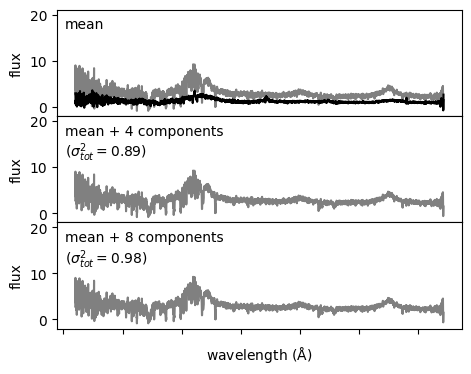

In [ ]:
# Plot the sequence of reconstructions
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8]):
    ax = fig.add_subplot(411 + i)
    ax.plot(bwave, spec, '-', c='gray')
    ax.plot(bwave, bflux_mean + np.dot(coeff[:n], evals_cs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()